In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Defining Function for Historical Data 
def Initialize(tickers,startyear,startmonth,startday,interval):
    yf.pdr_override()
    tickers=tickers
    startyear=startyear
    startmonth=startmonth
    startday=startday
    interval=interval
    start=dt.datetime(startyear,startmonth,startday,)
    now=dt.datetime.now()
    df=pdr.get_data_yahoo(tickers,start,now, interval=interval,)
    df.drop(['High', 'Low','Open','Close','Volume'], axis=1, inplace=True)
    df.columns = df.columns.droplevel(0)
    return df

In [3]:
#Creation of new Dataframe as per provided details
df=Initialize(tickers=['GOOGL', 'AAPL'],
           startyear=2020,
           startmonth=7,
           startday=1,
           interval="1d")

[*********************100%***********************]  2 of 2 completed


In [4]:
#Creation of new Dataframe for returns of securities
df2=df.pct_change()
df2.dropna(inplace=True)
print(df2.head())

                AAPL     GOOGL
Date                          
2020-07-01 -0.001892  0.016889
2020-07-02  0.000000  0.019369
2020-07-06  0.026750  0.020219
2020-07-07 -0.003103 -0.006488
2020-07-08  0.023290  0.009182


In [5]:
#Obtaining Mean of the securities for defined timeseries
mean=df2.mean(axis=0)
mean_AAPL=mean[0]
mean_GOOGL=mean[1]

Annual_Mean_AAPL=mean[0]*12
Annual_Mean_GOOGL=mean[1]*12

In [6]:
#Obtaining Var of the securities for defined timeseries
Var=df2.var(axis=0)
Var_AAPL=Var[0]
Var_GOOGL=Var[1]

Annual_Var_AAPL=Var[0]*12
Annual_Var_GOOGL=Var[1]*12

In [7]:
#Obtaining Standard Deviation of the securities for defined timeseries
Std=df2.std(axis=0)
Std_AAPL=Std[0]
Std_GOOGL=Std[1]

Annual_Std_AAPL=Std[0]*math.sqrt(12)
Annual_Std_GOOGL=Std[1]*math.sqrt(12)

In [8]:
#Obtaining Correlation Coefficient
Cov=df2.cov()
Cov_AAPL_GOOGL=Cov.iloc[1, 0]

Corr=df2.corr()
Corr_AAPL_GOOGL=Corr.iloc[1, 0]

In [9]:
#Defining weights  and Expected Returns of securities
weight_AAPL=np.linspace(-0.5,1.5,num=50)
weight_GOOGL=1-weight_AAPL

E_AAPL=mean_AAPL
E_GOOGL=mean_GOOGL

In [10]:
#Expected portfolio return (Ep) = ((weight_AAPL * E_AAPL) + (weight_GOOGL * E_GOOGL))
#Where weight_GOOGL=1-weight_AAPL

Ep=np.array(weight_AAPL*E_AAPL + weight_GOOGL*E_GOOGL)

#Portfolio standard deviation (Sp) = ((weight_AAPL**2)*Var_AAPL) + ((weight_GOOGL**2)* Var_GOOGL) + (2*weight_AAPL*weight_GOOGL*Cov_AAPL_GOOGL)
Sp=np.array((weight_AAPL**2)*Var_AAPL)+((weight_GOOGL**2)*Var_GOOGL)+(2*weight_AAPL*weight_GOOGL*Cov_AAPL_GOOGL)

In [11]:
#Creating new df with columns Weight_AAPL, Portfolio Standard Deviation and Expected Portfolio Return
df_portfolio = pd.DataFrame(columns=['weight_AAPL', 'Portfolio_standard_deviation', 'Expected_portfolio_return'])
df_portfolio['weight_AAPL']=weight_AAPL
df_portfolio['Portfolio_standard_deviation']=Sp
df_portfolio['Expected_portfolio_return']=Ep
print(df_portfolio.head())

   weight_AAPL  Portfolio_standard_deviation  Expected_portfolio_return
0    -0.500000                      0.000468                   0.002835
1    -0.459184                      0.000445                   0.002810
2    -0.418367                      0.000424                   0.002785
3    -0.377551                      0.000404                   0.002760
4    -0.336735                      0.000385                   0.002735


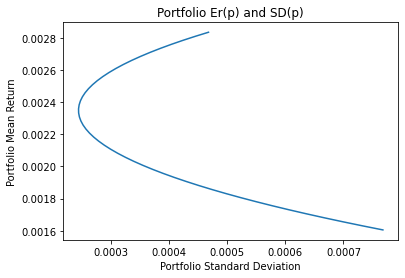

In [12]:
#Making beautiful graph
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Mean Return")
plt.title("Portfolio Er(p) and SD(p)")
plt.plot(Sp,Ep)
plt.show()